In [1]:
!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2022-05-29 18:23:49--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2022-05-29 18:23:49--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2022-05-29 18:23:50--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:44

In [2]:
import sparknlp
spark = sparknlp.start()

print("Spark NLP version: {}".format(sparknlp.version()))
print("Apache Spark version: {}".format(spark.version))

Spark NLP version: 3.4.4
Apache Spark version: 3.0.3


In [3]:
df = spark.read.csv("/content/part-00000-9a26325f-9aac-42ae-a673-7446a5891c85-c000.csv")
df.show()

+----------+--------------------+--------------------+--------------------+
|       _c0|                 _c1|                 _c2|                 _c3|
+----------+--------------------+--------------------+--------------------+
|#loltyler1|2022-05-18T13:16:...|           PepeLaugh|             chururu|
|#asmongold|2022-05-18T13:16:...|there's actually ...|       hotchocolate_|
|#asmongold|2022-05-18T13:16:...| How did they sleep?|          tensolin01|
|#asmongold|2022-05-18T13:16:...|Hey zack! what ar...|        shadowprides|
|#asmongold|2022-05-18T13:16:...|   KEKL HES LAUGHING|           infero_rs|
|#asmongold|2022-05-18T13:16:...|               UMMMM|          kekw_typer|
|#asmongold|2022-05-18T13:16:...|         Magnum pint|             reset_3|
|#asmongold|2022-05-18T13:16:...|       GIGA MEGAPINT|          braybaybay|
|#asmongold|2022-05-18T13:16:...|magnum bottle for...|     shadow_slayer84|
|#asmongold|2022-05-18T13:16:...|                null|           biozilla_|
|#asmongold|

In [4]:
df = df.selectExpr("_c0 as channel", "_c1 as datetime", "_c2 as message", "_c3 as username")
df.printSchema()

root
 |-- channel: string (nullable = true)
 |-- datetime: string (nullable = true)
 |-- message: string (nullable = true)
 |-- username: string (nullable = true)



In [5]:
df.show(n=10,truncate=False)

+----------+--------------------------+-----------------------------------------------------------------+---------------+
|channel   |datetime                  |message                                                          |username       |
+----------+--------------------------+-----------------------------------------------------------------+---------------+
|#loltyler1|2022-05-18T13:16:23.552211|PepeLaugh                                                        |chururu        |
|#asmongold|2022-05-18T13:16:23.552356|there's actually a bunch of weird ass names for wine bottle sizes|hotchocolate_  |
|#asmongold|2022-05-18T13:16:23.552509|How did they sleep?                                              |tensolin01     |
|#asmongold|2022-05-18T13:16:23.945155|Hey zack! what are you doing on  @Asmongold channel?             |shadowprides   |
|#asmongold|2022-05-18T13:16:24.108031|KEKL HES LAUGHING                                                |infero_rs      |
|#asmongold|2022-05-18T1

In [50]:
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import pandas as pd

In [10]:
pdDf = df.toPandas()
pdDf.head()

,channel,datetime,message,username
0,#loltyler1,2022-05-18T13:16:23.552211,PepeLaugh,chururu
1,#asmongold,2022-05-18T13:16:23.552356,there's actually a bunch of weird ass names fo...,hotchocolate_
2,#asmongold,2022-05-18T13:16:23.552509,How did they sleep?,tensolin01
3,#asmongold,2022-05-18T13:16:23.945155,Hey zack! what are you doing on @Asmongold ch...,shadowprides
4,#asmongold,2022-05-18T13:16:24.108031,KEKL HES LAUGHING,infero_rs


In [11]:
pdDf[pdDf.username=="fossabot"][ pdDf.channel=="#asmongold"].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,channel,datetime,message,username
968,#asmongold,2022-05-18T13:18:06.751754,"@HavenAU, Please stop one-man spamming. [warning]",fossabot
1278,#asmongold,2022-05-18T13:18:40.384981,"@jordan_rehbock, Please stop one-man spamming....",fossabot
1596,#asmongold,2022-05-18T13:19:22.131524,"@bosnianvibe, Please stop one-man spamming. [w...",fossabot
1601,#asmongold,2022-05-18T13:19:22.458026,@Stingler7 Asmongold has been live for 18 minu...,fossabot
1758,#asmongold,2022-05-18T13:19:48.184743,"@BackScratch, Please stop one-man spamming. [w...",fossabot


In [48]:
count=pdDf.groupby(['username','channel'])['message'].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) 
count.head()

,username,channel,count
3457,fossabot,#loltyler1,400
3456,fossabot,#asmongold,136
909,based_one,#loltyler1,118
5355,kekw_spammer_,#loltyler1,112
7595,orkx10,#asmongold,96


,count
count,11706.000000
mean,3.561165
std,7.035060
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,400.000000


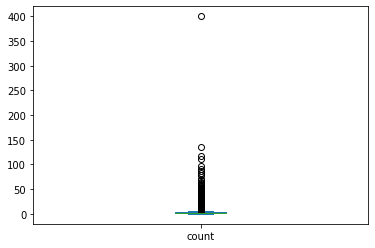

In [25]:
count.plot.box()
count.describe()

In [24]:
# actual content is inside description column
document = DocumentAssembler()\
    .setInputCol("message")\
    .setOutputCol("document")
    
# we can also use sentence detector here 
# if we want to train on and get predictions for each sentence
# downloading pretrained embeddings
use = UniversalSentenceEncoder.pretrained()\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")  

#tokenizer = Tokenizer(inputCol="username", outputCol="user")
# wordsData = tokenizer.transform(dfSmall)

#hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="rawFeatures")
# featurizedData = hashingTF.transform(wordsData)
# alternatively, CountVectorizer can also be used to get term frequency vectors

#idf = IDF(inputCol=hashingTF.getOutputCol(), outputCol="features")

#assembler = VectorAssembler(inputCols=["features", "class"],outputCol="finFeatures")
#idfModel = idf.fit(featurizedData)
#rescaledData = idfModel.transform(featurizedData)

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
  .setInputCols(["sentence_embeddings"])\
  .setOutputCol("class")\
  .setLabelColumn("channel")\
  .setMaxEpochs(5)\
  .setEnableOutputLogs(True)

#dt = DecisionTreeClassifier(labelCol="channel", featuresCol="finFeatures")

use_clf_pipeline = Pipeline(
    stages = [
        document,
        use,
        #tokenizer,
        #hashingTF,
        #idf,
        classsifierdl
        #assembler,
        #dt
    ])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [91]:
trainDataset, valDataset, testDataset = df.randomSplit([0.6, 0.2, 0.2])

In [45]:

doc=document.transform(df)
encoded=use.transform(doc[doc.username=='fossabot'])
encoded.show(truncate=False)

+----------+--------------------------+-------------------------------------------------------------------+--------+-------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [152]:
df_nobot=df[df.username!= "fossabot"]
trainDataset2, valDataset2, testDataset2 = df_nobot.randomSplit([0.6, 0.2, 0.2])

In [67]:
tokenizer = Tokenizer(inputCol="message", outputCol="words")
wordsData = tokenizer.transform(df[df.username=='fossabot'])
words=wordsData.toPandas
wordsData.words.str[0]
#words.groupby(['words']).count()

Column<b'words[str][0]'>

In [162]:
use_pipelineModel = use_clf_pipeline.fit(trainDataset)

In [93]:
!cd ~/annotator_logs && ls -l

total 4
-rw-r--r-- 1 root root 451 May 29 15:18 ClassifierDLApproach_60604633014e.log


In [94]:
!cat ~/annotator_logs/ClassifierDLApproach_a1f443bd0f1f.log

cat: /root/annotator_logs/ClassifierDLApproach_a1f443bd0f1f.log: No such file or directory


In [163]:
preds = use_pipelineModel.transform(valDataset)
preds.show()

+----------+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+
|   channel|            datetime|             message|       username|            document| sentence_embeddings|               class|
+----------+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+
|#asmongold|2022-05-18T13:16:...|there's actually ...|  hotchocolate_|[[document, 0, 64...|[[sentence_embedd...|[[category, 0, 64...|
|#asmongold|2022-05-18T13:16:...|         Magnum pint|        reset_3|[[document, 0, 10...|[[sentence_embedd...|[[category, 0, 10...|
|#asmongold|2022-05-18T13:16:...|            MEGAPINT|     reaver2828|[[document, 0, 7,...|[[sentence_embedd...|[[category, 0, 7,...|
|#asmongold|2022-05-18T13:16:...|The picture of th...|      takykardi|[[document, 0, 45...|[[sentence_embedd...|[[category, 0, 45...|
|#asmongold|2022-05-18T13:16:...|            Asmun :D| good_pl

In [96]:
from pyspark.sql.functions import col
preds.take(1)[0][6]

[Row(annotatorType='category', begin=0, end=64, result='#asmongold', metadata={'sentence': '0', '#asmongold': '1.0', '#loltyler1': '1.0592332E-29'}, embeddings=[])]

In [97]:
from sklearn.metrics import classification_report, accuracy_score

finDf = preds.select('class.metadata.#asmongold').toPandas()

AnalysisException: ignored

In [164]:
finDf = preds.select('channel', 'message', 'class.result').toPandas()

In [165]:
finDf

,channel,message,result
0,#asmongold,there's actually a bunch of weird ass names fo...,[#asmongold]
1,#asmongold,Magnum pint,[#asmongold]
2,#asmongold,MEGAPINT,[#asmongold]
3,#asmongold,The picture of the bed did not have glass on??,[#asmongold]
4,#asmongold,Asmun :D,[#loltyler1]
...,...,...,...
8441,#loltyler1,BigBrother,[#loltyler1]
8442,#loltyler1,NICE FLASH KEKW,[#loltyler1]
8443,#loltyler1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,[#asmongold]
8444,#loltyler1,IDC BigBrother,[#loltyler1]


In [166]:
finDf['result'] = finDf.result.str[0]
finDf['result'].unique()

array(['#asmongold', '#loltyler1', nan], dtype=object)

In [167]:
finDf

,channel,message,result
0,#asmongold,there's actually a bunch of weird ass names fo...,#asmongold
1,#asmongold,Magnum pint,#asmongold
2,#asmongold,MEGAPINT,#asmongold
3,#asmongold,The picture of the bed did not have glass on??,#asmongold
4,#asmongold,Asmun :D,#loltyler1
...,...,...,...
8441,#loltyler1,BigBrother,#loltyler1
8442,#loltyler1,NICE FLASH KEKW,#loltyler1
8443,#loltyler1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,#asmongold
8444,#loltyler1,IDC BigBrother,#loltyler1


In [168]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
chanSeries = le.fit_transform(finDf['channel'])
resSeries = le.fit_transform(finDf['result'])

In [108]:
resSeries

array([0, 0, 0, ..., 0, 1, 1])

In [169]:
from sklearn.metrics import classification_report

print(classification_report(chanSeries, resSeries))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6298
           1       0.84      0.58      0.69      2148
           2       0.00      0.00      0.00         0

    accuracy                           0.86      8446
   macro avg       0.57      0.51      0.53      8446
weighted avg       0.86      0.86      0.86      8446



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(chanSeries, resSeries))

[[6046  237   15]
 [ 896 1252    0]
 [   0    0    0]]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# save best model to specified path
mPath =  "/content/gdrive/MyDrive/AA/"
use_clf_pipeline.write().overwrite().save(mPath)

In [ ]:
!zip -r /content/drive/MyDrive/ /content/Folder_To_Zip

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
	zip warning: name not matched: /content/Folder_To_Zip

zip error: Nothing to do! (try: zip -r /content/drive/MyDrive/ . -i /content/Folder_To_Zip)


In [ ]:

# read pickled model via pipeline api
from pyspark.ml.pipeline import PipelineModel
persistedModel = PipelineModel.load(mPath)

# predict
predictionsDF = persistedModel.transform(test_df)

In [ ]:
# actual content is inside description column
document = DocumentAssembler()\
    .setInputCol("message")\
    .setOutputCol("document")
    
# we can also use sentence detector here 
# if we want to train on and get predictions for each sentence
# downloading pretrained embeddings
use = UniversalSentenceEncoder.pretrained()\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")  

tokenizer = Tokenizer(inputCol="username", outputCol="user")
# wordsData = tokenizer.transform(dfSmall)

hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="rawFeatures")
# featurizedData = hashingTF.transform(wordsData)
# alternatively, CountVectorizer can also be used to get term frequency vectors

idf = IDF(inputCol=hashingTF.getOutputCol(), outputCol="features")

#idfModel = idf.fit(featurizedData)
#rescaledData = idfModel.transform(featurizedData)

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
  .setInputCols(["sentence_embeddings"])\
  .setOutputCol("class")\
  .setLabelColumn("channel")\
  .setMaxEpochs(5)\
  .setEnableOutputLogs(True)

indexer = StringIndexer(inputCol="channel", outputCol="channelIndex")

assembler = VectorAssembler(inputCols=["features"],outputCol = "finFeatures")

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, labelCol='channelIndex', featuresCol='finFeatures')

use_clf_pipeline = Pipeline(
    stages = [
        document,
        use,
        tokenizer,
        hashingTF,
        idf,
        classsifierdl,
        indexer,
        assembler,
        lr
    ])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [ ]:
use_pipelineModel = use_clf_pipeline.fit(trainDataset)

In [ ]:
preds = use_pipelineModel.transform(valDataset)
preds.show()

+----------+--------------------+--------------------+---------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------+--------------------+--------------------+--------------------+----------+
|   channel|            datetime|             message|       username|            document| sentence_embeddings|             user|         rawFeatures|            features|               class|channelIndex|         finFeatures|       rawPrediction|         probability|prediction|
+----------+--------------------+--------------------+---------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------+--------------------+--------------------+--------------------+----------+
|#asmongold|2022-05-18T13:16:...|there's actually ...|  hotchocolate_|[[document, 0, 64...|[[sentence_embedd...|  [hotchocolate_]|(262144,[239999],...|(26214

In [ ]:
finDf = preds.select('channel', 'message', 'prediction').toPandas()

In [ ]:
#finDf['result'] = finDf['prediction'].str[0]
finDf['prediction'].nunique()

1